# Ridge Regression
Ridge Regression describes an $L_2$-penalized regression task.

`````{admonition} Task (Ridge Regression)
:class: tip
:name: ridge_task
**Given** a dataset of $n$ observations
\begin{equation*}\mathcal{D}=\left\{(\vvec{x}_i,y_i)\vert \vvec{x}_i\in\mathbb{R}^{d}, y_i\in\mathbb{R}, 1\leq i \leq n\right\},\end{equation*}  
the design matrix $X\in\mathbb{R}^{n\times p}$, where $X_{i\cdot}=\bm\phi(\vvec{x}_i)^\top$ and a regularization weight $\lambda>0$.     
**Find** the regression vector $\bm\beta$, solving the following objective
\begin{align}
    \min_{\bm\beta\in\mathbb{R}^p} RSS_{L_2}(\bm{\beta})&= \lVert \vvec{y}-X\bm\beta\rVert^2 +\lambda \lVert\bm{\beta}\rVert^2. 
\end{align}      
**Return** the predictor function $f:\mathbb{R}^d\rightarrow\mathbb{R}$, $f(\vvec{x})=\bm\phi(\vvec{x})^\top\bm\beta$ 
`````
## Optimization
First of all, we observe that the ridge regression objective is convex. The objective function $RSS_{L_2}$ is convex as it is the nonnegatively weighted sum of convex functions. The feasible set is the set $\mathbb{R}^p$, which is convex as well. Hence, the whole objective is a convex, unconstrained optimization problem. That means that every stationary point of the objective function is a minimizer. We can compute the stationary points as follows:
:::{math}
:label: eq:ridge
\begin{align*}
    &\nabla_{\bm{\beta}} RSS_{L_2}(\bm{\beta})= -2X^\top(\vvec{y}-X\bm{\beta}) +2\lambda\bm{\beta} =0 \\
    \Leftrightarrow\quad & (X^\top X+\lambda I){\bm{\beta}} = X^\top \vvec{y}
\end{align*}
:::
How does this change the standard set of regression solutions?
## Effect of the Regularization Weight
The following lemma indicates that the solutions of Ridge Regression computed above are always unique (exactly one regression vector $\beta$ solves the ridge regression objective).
`````{prf:lemma}
For any matrix $X\in\mathbb{R}^{n\times d}$, the matrix $X^\top X+\lambda I$ is invertible for all $\lambda>0$
`````
```{prf:proof}
Let $X=U\Sigma V^\top$ be the singular value decomposition of $X$, then
\begin{align}
    X^\top X+\lambda I 
    &= V(\Sigma^\top\Sigma +\lambda I )V^\top
\end{align}
The matrix $\Sigma^\top\Sigma +\lambda I$ is invertible, as it is a diagonal matrix where each value on the diagonal is at least as large as $\lambda>0$. Hence, the matrix $X^\top X+\lambda I$ is invertible and the inverse is $V(\Sigma^\top\Sigma +\lambda I )^{-1}V^\top$.  
```
As a result, we can multiply with $(X^\top X+\lambda I)^{-1}$ from the left in Eq. {eq}`eq:ridge` and obtain the ridge regression solver.
```{prf:corollary}
The solution to the {ref}`Ridge Regression<ridge_task>` task, is given by
$$\bm\beta_{L_2} = (X^\top X+\lambda I)^{-1}X^\top \vvec{y}$$
```
So, for any regularization weight $\lambda>0$ we have a unique regression solver, but for $\lambda=0$ we can get infinitely many solutions. Yet, what kind of solution do we get for really small $\lambda$? Is there one solution of the infinitely many that is somewhat better than the others? We can answer this question indeed with "yes", as the following theorem shows.
```{prf:theorem}
Let $X=U\Sigma V^\top\in\mathbb{R}^{n\times p}$ be the SVD of the design matrix of the {ref}`Ridge Regression<ridge_task>` task. If only $r<p$ singular values of $X$ are nonzero ($X$ has a rank of $r$), then the global minimizer $\bm{\beta}_{L_2}$ converges for decreasing regularization weights $\lambda\rightarrow 0$ to 
\begin{align*}
    \bm\beta_{L_2} &= (X^\top X+\lambda I)^{-1}X^\top \vvec{y} 
    &\rightarrow V\begin{pmatrix}\Sigma_r^{-1} U_r^\top \vvec{y}\\ \mathbf{0}\end{pmatrix} 
\end{align*}
$\Sigma_r$ denotes here the matrix containing only the first $r$ rows and columns of the singular values matrix $\Sigma$ and $U_r$ denotes the matrix containing the first $r$ left singular vectors (the first $r$ columns of $U$).
```
````{toggle}
```{prf:proof}
We substitute $X$ with its SVD in Eq. {eq}`eq:ridge` yielding the ridge regression solutions.
\begin{align*}
(X^\top X+\lambda I){\bm{\beta}} &= X^\top \vvec{y}\\
\Leftrightarrow (V\Sigma^\top\Sigma V^\top+\lambda I){\bm{\beta}} &= V\Sigma^\top U^\top \vvec{y}\\
\Leftrightarrow V(\Sigma^\top\Sigma +\lambda I)V^\top{\bm{\beta}} &= V\Sigma^\top U^\top \vvec{y}\\
    \Leftrightarrow {\bm{\beta}}&= V(\Sigma^\top\Sigma +\lambda I )^{-1}\Sigma^\top U^\top \vvec{y}
\end{align*}
We use the notation of Observation {ref}`obs:sigma_r` to compute
\begin{align*}
    (\Sigma^\top\Sigma +\lambda I )^{-1}\Sigma^\top &= 
    \left(
    \begin{array}{c;{2pt/2pt}c}
    \begin{matrix}
    \frac{1}{\sigma^2_1+\lambda} & \ldots & 0  \\
    \vdots  & \ddots  & \vdots \\
    0 & \ldots   & \frac{1}{\sigma^2_r+\lambda} 
    \end{matrix} & \vvec{0} \\
    \vvec{0} &
    \begin{matrix}
     \frac1\lambda &&\\
     &  \ddots & \\
     &  & \frac1\lambda
    \end{matrix}
    \end{array}
    \right)
    \left(
    \begin{array}{c;{2pt/2pt}c}
    \begin{matrix}
        \sigma_1 & \ldots & 0  \\
        \vdots  & \ddots  & \vdots \\
        0 & \ldots   & \sigma_r\\
        \\
        & \mathbf{0} &\\
        \\
    \end{matrix}
    & \mathbf{0}
    \end{array}
    \right)\\
    &= \left(
    \begin{array}{c;{2pt/2pt}c}
    \begin{matrix}
    \frac{\sigma_1}{\sigma^2_1+\lambda} & \ldots & 0  \\
    \vdots  & \ddots  & \vdots \\
    0 & \ldots   & \frac{\sigma_r}{\sigma^2_r+\lambda} 
    \end{matrix} & \vvec{0} \\
    \vvec{0} & \vvec{0}
    \end{array}
    \right).
\end{align*}
Hence, the lower $p-r$ rows of $(\Sigma^\top\Sigma +\lambda I )^{-1}\Sigma^\top U^\top \vvec{y}$ are equal to zero, returning
$$\bm\beta=V \begin{pmatrix}\diag(\frac{\sigma_1}{sigma_1^2 + \lambda},\ldots, \frac{\sigma_r}{sigma_r^2 + \lambda}) U_r^\top \vvec{y}\\ \mathbf{0}\end{pmatrix}. $$
For $\lambda\rightarrow 0$, the diagonal matrix above converges to $\Sigma_r^{-1}$.
```
````
Let's look again at the plot of {prf:ref}`example_reg_p_larger_n`. The regression function that we learn has four parameters, but we have only three data points. Hence, we have $p-r=1$ and our regression solution vectors are computed as $\beta=V\mathbf{w}$ where $\vvec{w}=\begin{pmatrix}\Sigma_r^{-1} U_r^\top \vvec{y}\\ w_4\end{pmatrix}$ and $w_4\in\mathbb{R}$. If $w_4=0$, then the resulting $\beta$ is the one that ridge regression converges to when $\lambda\rightarrow 0$. We plot now the resulting regression functions, depending on the value of $w_4$ and get the following:  

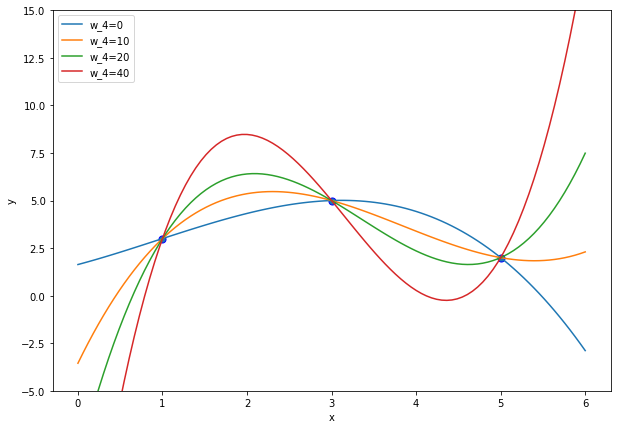

In [16]:
import numpy as np
import matplotlib.pyplot as plt
D = np.array([5,3,1])
y = np.array([2,5,3])
def ϕ(x):
    return np.row_stack((np.ones(x.shape[0]),x, x**2, x**3))
X=ϕ(D).T
U,σs,Vt = np.linalg.svd(X, full_matrices=True)
V=Vt.T
Σ = np.column_stack((np.diag(σs),np.zeros(3)))

plt.figure(figsize=(10, 7))
x = np.linspace(0, 6, 100)

Σ_pseudoinv = Σ.copy()
Σ_pseudoinv[Σ>0] = 1/Σ[Σ>0]
w = Σ_pseudoinv.T@U.T@y
for w_4 in [0,10,20,40]:
    w[3] = w_4
    β = V@w
    f_x = ϕ(x).T@β
    plt.plot(x, f_x, label="w_4="+str(w_4))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5, 15))
plt.legend(loc="best")
plt.show()

We observe that the regression function for $w_4=0$ is not as curvy as the other ones. Generally, the higher the value of $w_4$, the steeper are the slopes of the regression function. We can imagine that the rather erratic functions arising from high values in the parameter $w_4$ are not desirable, as it result in a high variance among the models, depending on the training data. As a result, ridge regression gives us an idea which function we should choose when the regression objective has infinitely many solutions.

## Example
Let's use again {prf:ref}`example_reg_p_larger_n`, but now we apply ridge regression with varying regularization weights. We implement a ridge regression solver, returning the regression parameter vector $\beta_{L_2}$ for a given design matrix $X$, target vector $\vvec{y}$ and regularization weight $\lambda$. 

In [4]:
import numpy as np

D = np.array([5,3,1])
y = np.array([2,5,3])

def β_ridge(X, y, λ):
    p= X.shape[1]
    return np.linalg.inv(X.T@X + λ*np.eye(p))@X.T@y

Now we plot the ridge regression functions for varying regularization weights.

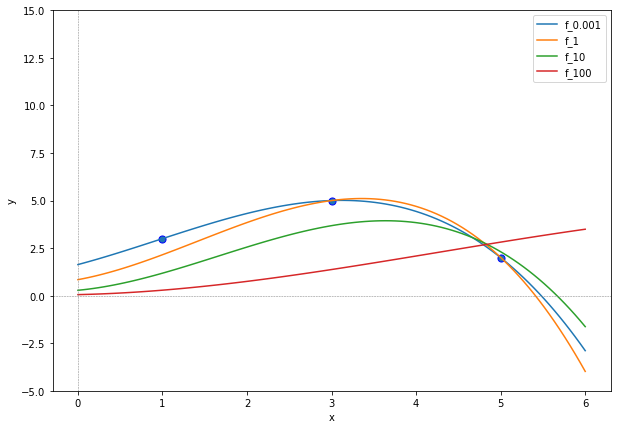

In [21]:
import matplotlib.pyplot as plt
def ϕ(x):
    return np.row_stack((np.ones(x.shape[0]),x, x**2, x**3))
X=ϕ(D).T

plt.figure(figsize=(10, 7))
x = np.linspace(0, 6, 100)
for λ in [0.001,1,10, 100]:
    β = β_ridge(X, y, λ)
    f_x = ϕ(x).T@β
    plt.plot(x, f_x, label="f_"+str(λ))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5, 15))
plt.axhline(0, linewidth=0.5, linestyle='--', color='gray') # horizontal lines
plt.axvline(0, linewidth=0.5, linestyle='--', color='gray') # vertical lines
plt.legend(loc="best")
plt.show()

We see that the functions become with increasing penalization weight more "flat". This is of course what we would have expected. With increasing penalization weight $\lambda$, the minimization of the norm $\lVert\beta\rVert^2$ becomes more important than the fit to the data expressed by the $RSS$. But is this plot really showing you what you expected in terms of a simple function fitting to the data? After all, the idea of Ridge Regression is to regularize the learned function by putting a dampener on the coefficients of the basis functions. That is, we wanted to make the regression function more simple while still having a good fit to the data. But the regression function with high penalization weight $\lambda=100$ is not fitting the data very well and neither does it look simple (it is curving to weirdly, basically inversely to the curvature of the data points). 

## Why we shouldn't penalize the bias term
The example shows (and it should be clear from the objective) that we obtain for a very high value of $\lambda$ in the ridge regression objective a ridge regression vector $\beta_{L_2}$ close to zero. That means that the resulting regression function $f(x)=\phi(x)^\top \beta$ approximates the constant zero function when $\lambda\rightarrow \infty$. However, whether we have an affine basis function $f(\mathbf{x})=\beta_d x_d+\ldots \beta_1 x_1 + \beta_0$ or polynomial ones $f(x)=\beta_2x^2+ \beta_2 x + \beta_0$, it doesn't make much sense to penalize nonzero values of the bias term $\beta_0$. That is because the centering of the target vector can then make a big difference in the outcome of the found regression term. Let us consider the previous example, but now we center $y$.

That is, we use now a polynomial regression function $f(x)=\beta_2x^2 + \beta_1 x + b$, where $b$ is the mean target value of $y$. We fit the regression function on the centered target values and then translate the regression function such that it approximates the original targets.

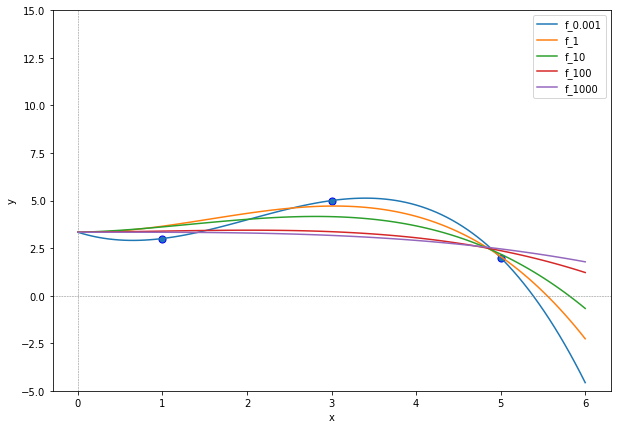

In [22]:
import matplotlib.pyplot as plt
def ϕ(x):
    return np.row_stack((x, x**2, x**3)) #we exclude the bias term from the design matrix
X=ϕ(D).T

b=np.mean(y)
y_centered = y- b


plt.figure(figsize=(10, 7))
x = np.linspace(0, 6, 100)
for λ in [0.001,1,10, 100, 1000]:
    β = β_ridge(X, y_centered, λ)
    f_x = ϕ(x).T@β + b
    plt.plot(x, f_x, label="f_"+str(λ))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5, 15))
plt.axhline(0, linewidth=0.5, linestyle='--', color='gray') # horizontal lines
plt.axvline(0, linewidth=0.5, linestyle='--', color='gray') # vertical lines
plt.legend(loc="best")
plt.show()

We see that the regression functions are now closer to the training data points, even for quite high penalization weights $\lambda>100$. The regression functions also look now more simple while still fitting to the data.      
We indicate the ridge regression parameters in numbers for varying regularization weights below. 

In [23]:
for λ in [0.001,1,10, 100, 1000]:
    β = β_ridge(X, y_centered, λ)
    print(λ,"\t",np.round(β,3))

0.001 	 [-1.411  1.295 -0.213]
1 	 [-0.074  0.499 -0.107]
10 	 [ 0.101  0.243 -0.062]
100 	 [ 0.027  0.052 -0.019]
1000 	 [ 0.003  0.005 -0.008]


We see that the resulting ridge regression parameters approximate zero for high values of $\lambda$, but they don't become actually zero. If we look back at the orginal motivation for applying the $L_2$-norm regularization, the goal to obtain sparse regression vectors and to obtain a feature selection, then we observe that ridge regression can not deliver in that use case. However, we do observe a regularizing effect in the sense that very big regularization weights get penalized by the $L_2$-norm regularization term.